# Cleaning Up the Datasets

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
#Importing Data
condensates = pd.read_csv('/work/Data/download-data.csv')
protein_interactions = pd.read_csv("/work/Data/opencell-protein-interactions.csv")
protein_localization = pd.read_csv("/work/Data/opencell-localization-annotations.csv")

conf_cond_parents = pd.read_csv('/work/Data/condensate_parents_w_score.csv')
#experiements = pd.read_json('/work/Condensate_Data/experiments.json', lines = True)
#post_translation = pd.read_json('/work/Condensate_Data/post_translational_modifications.json', lines = True)
proteins = pd.read_json('/work/Condensate_Data/proteins.json', lines = True)

In [3]:
proteins

,_id,created_at,updated_at,uniprot_id,uniprot_readable_id,name,gene_name,species_name,species_tax_id,ensembl_id,ensembl_gene_id,sequence,llps_ptms,function,iupred_score,functional_type,source_db_tags,pubmed_ids,biomolecular_condensate_count,synthetic_condensate_count
0,{'$oid': '600ecc2aaba06000899d5ca3'},{'$date': '2021-01-25T14:48:00.219Z'},{'$date': '2023-04-26T11:23:01.622Z'},Q9GZQ8,MLP3B_HUMAN,Microtubule-associated proteins 1A/1B light ch...,MAP1LC3B,Homo sapiens,9606,ENST00000650688,ENSG00000140941,MPSEKTFKQRRTFEQRVEDVRLIREQHPTKIPVIIERYKGEKQLPV...,None,Ubiquitin-like modifier involved in formation ...,"[0.63748, 0.675549, 0.46524099999999996, 0.501...",client,"[llps_db_more_comp, phase_pro_2_ps, dr_llps, p...","[29507397, 29343546]",1,1
1,{'$oid': '600ecc2aaba06000899d5ca8'},{'$date': '2021-01-25T14:48:01.576Z'},{'$date': '2023-04-26T11:23:01.072Z'},Q13151,ROA0_HUMAN,Heterogeneous nuclear ribonucleoprotein A0,HNRNPA0,Homo sapiens,9606,ENST00000314940,ENSG00000177733,MENSQLCKLFIGGLNVQTSESGLRGHFEAFGTLTDCVVVVNPQTKR...,None,mRNA-binding component of ribonucleosomes. Spe...,"[0.05306, 0.078022, 0.106997, 0.074921, 0.1092...",client,"[llps_db_1_comp, phase_pro_2_ps, dr_llps, dd_c...","[29961577, 25995375, 15635413]",3,1
2,{'$oid': '600ecc2aaba06000899d5cac'},{'$date': '2021-01-25T14:48:02.634Z'},{'$date': '2023-04-26T11:23:01.199Z'},Q15717,ELAV1_HUMAN,ELAV-like protein 1,ELAVL1,Homo sapiens,9606,ENST00000596459,ENSG00000066044,MSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEV...,None,RNA-binding protein that binds to the 3'-UTR r...,"[0.521092, 0.5664800000000001, 0.458154, 0.483...",client,"[phase_pro_2_ps, dr_llps, dd_code, phase_pro_1...","[33650968, 33650968, 25995375, 28965817, 29373...",3,2
3,{'$oid': '600ecc2aaba06000899d5cc1'},{'$date': '2021-01-25T14:48:08.536Z'},{'$date': '2023-04-26T11:23:00.755Z'},P45973,CBX5_HUMAN,Chromobox protein homolog 5,CBX5,Homo sapiens,9606,ENST00000550411,ENSG00000094916,MGKKTKRTADSSSSEDEEEYVVEKVLDRRVVKGQVEYLLKWKGFSE...,[11-14__phosphorylation],Component of heterochromatin that recognizes a...,"[0.7459089999999999, 0.7546919999999999, 0.762...",driver,"[llps_db_1_comp, phase_pro_2_ps, dr_llps, dd_c...","[32257349, 28636604, 31952807, 28636604, 28636...",2,9
4,{'$oid': '600ecc2aaba06000899d5ca2'},{'$date': '2021-01-25T14:47:59.947Z'},{'$date': '2023-04-26T11:23:00.336Z'},O43561,LAT_HUMAN,Linker for activation of T-cells family member 1,LAT,Homo sapiens,9606,ENST00000566177,ENSG00000213658,MEEAILVPCVLGLLLLPILAMLMALCVHCHRLPGSYDSTSSDSLYP...,"[200__phosphorylation, 220__phosphorylation]",Required for TCR (T-cell antigen receptor)- an...,"[0.050641, 0.083462, 0.059222, 0.0453519999999...",driver,"[phase_pro_1_rev, phase_pro_2_ps, dr_llps, pha...","[31268421, 27056844, 29424691, 30846600, 33080...",2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,{'$oid': '649d4e327a13334fedf06d47'},{'$date': '2023-06-29T11:26:21.435Z'},{'$date': '2023-06-29T11:26:23.123Z'},O94953,KDM4B_HUMAN,Lysine-specific demethylase 4B,KDM4B,Homo sapiens,9606,ENST00000381759.8,ENSG00000127663.15,MGSEDHGAQNPSCKIMTFRPTMEEFKDFNKYVAYIESQGAHRAGLA...,None,Histone demethylase that specifically demethyl...,"[0.868118, 0.868118, 0.728858, 0.728858, 0.608...",member,None,[35887012],0,1
9633,{'$oid': '64df78d192336f9f043df825'},{'$date': '2023-08-18T15:57:44.177Z'},{'$date': '2023-08-18T15:57:47.625Z'},P26339,CMGA_MOUSE,Chromogranin-A,Chga,Mus musculus,10090,ENSMUST00000021610,ENSMUSG00000021194,MRSTAVLALLLCAGQVFALPVNSPMTKGDTKVMKCVLEVISDSLSK...,None,Regulates granule biogenesis in endocrine cell...,"[0.088832, 0.047319, 0.059222, 0.086953, 0.113...",driver,None,[36173346],1,0
9634,{'$oid': '64df78d192336f9f043df827'},{'$date': '2023-08-18T15:57:44.662Z'},{'$date': '2023-08-18T15:57:47.622Z'},P10354,CMGA_RAT,Chromogranin-A,Chga,Rattus norvegicus,10116,None,None,MRSSAALALLLCAGQVFALPVNSPMTKGDTKVMKCVLEVISDSLSK...,None,Serpinin regulates granule biogenesis in endoc...,"[0.14757399999999998, 0.078022,

In [4]:
# Human condensate proteins, from raw CD-CODE
human_proteins_cleaned = proteins.loc[proteins['species_name'] == "Homo sapiens", ["name", "uniprot_id", "biomolecular_condensate_count","synthetic_condensate_count"]]

In [5]:
# high confidence condensate proteins, from raw CD-CODE
conf_cond_parents = pd.read_csv('/work/Data/condensate_parents_w_score.csv')
high_conf_condensates = conf_cond_parents.loc[conf_cond_parents["confidence_score"] >= 2]
high_conf_human_condensates = high_conf_condensates.loc[high_conf_condensates["species_name"] == "Homo sapiens"]

In [6]:
high_conf_human_condensates

,name,uid,species_name,protein_confidence_score,confidence_score
10,Granular component,80B4651A,Homo sapiens,{'P06748': 5},5
11,Heterochromatin,B57B8AD8,Homo sapiens,"{'Q14781': 5, 'P45973': 5}",5
12,Galectin complex,F47B63CC,Homo sapiens,{'P17931': 5},5
13,TIS granule,ACCC2039,Homo sapiens,{'Q07352': 4},4
24,Tau inclusion,002A7221,Homo sapiens,{'P10636-8': 5},5
...,...,...,...,...,...
638,SOD1 in vitro condensate,F1AC7DF2,Homo sapiens,{'P00441': 3},3
639,Tau-Prion Multiphasic condensate,8188F968,Homo sapiens,"{'P10636': 3, 'P04156': 3}",3
640,Lysine demethylase condensate,3FEF42AA,Homo sapiens,"{'Q9Y2K7': 4, 'O94953': 4}",4
643,Chromogranin condensates,2ECFBB9C,Homo sapiens,{'P10645': 4},4


In [7]:
#Normalizing P Values

max_pval = max(protein_interactions.pval)
protein_interactions["normalized_pvalue"] = protein_interactions.pval/max_pval

#Removing all outliers and Isolate Essential Columns
cleaned_protein_interaction = protein_interactions.loc[protein_interactions["normalized_pvalue"] >= 0.05, ["target_gene_name","interactor_gene_name","interactor_uniprot_ids","normalized_pvalue"] ]

In [8]:
#making it only human condensates and removing not needed columns
human_condensates = condensates.loc[condensates['Species Name'] == 'Homo sapiens'].drop(['Species Name', 'Species Tax Id', 'Biomolecular/Synthetic'], axis=1)

In [9]:
#Changes index at target gene.
cleaned_protein_interaction = protein_interactions.set_index('target_gene_name')

In [10]:
# Index protein localization by target_gene
protein_localization = protein_localization.set_index('target_name')

In [11]:
#Joining both dataframes
cleaned_protein_interaction = cleaned_protein_interaction.join(protein_localization)

In [12]:
cleaned_protein_interaction.loc['AAMP']

,interactor_gene_name,target_ensg_id,interactor_ensg_id,interactor_uniprot_ids,pval,enrichment,interaction_stoichiometry,abundance_stoichiometry,normalized_pvalue,ensg_id,annotations_grade_3,annotations_grade_2,annotations_grade_1
AAMP,ARGLU1,ENSG00000127837,ENSG00000134884,Q9NWB6;Q9NWB6-3;Q9NWB6-2,5.495914,2.868131,0.128618,0.222927,0.033706,ENSG00000127837,cytoplasmic,NaN,nucleoplasm
AAMP,CWF19L2,ENSG00000127837,ENSG00000152404,Q2TBE0;Q2TBE0-2;H7C3G7;Q2TBE0-3;H0YE03,5.480125,2.889502,0.022009,0.063036,0.033609,ENSG00000127837,cytoplasmic,NaN,nucleoplasm
AAMP,PRPF40A,ENSG00000127837,ENSG00000196504,A0A3F2YNY6;O75400-2;O75400-3;O75400;H0YG38;F5H578,5.321102,3.228531,0.001582,0.742017,0.032634,ENSG00000127837,cytoplasmic,NaN,nucleoplasm
AAMP,RPL10,ENSG00000127837,ENSG00000147403,X1WI28;P27635;B8A6G2;A6QRI9;Q96L21,15.156173,4.847218,0.521148,13.146910,0.092951,ENSG00000127837,cytoplasmic,NaN,nucleoplasm
AAMP,RSRC1,ENSG00000127837,ENSG00000174891,Q96IZ7-2;Q96IZ7;H7C5Q0;C9J713;C9J367;C9J8Q2;C9...,5.929453,3.239392,0.013171,0.210926,0.036365,ENSG00000127837,cytoplasmic,NaN,nucleoplasm
AAMP,SRSF6,ENSG00000127837,ENSG00000124193,A0A590UJK4;A0A590UK01;A0A590UJP7;A0A590UK80;Q1...,5.386945,2.836663,0.017558,0.612574,0.033038,ENSG00000127837,cytoplasmic,NaN,nucleoplasm
AAMP,SSRP1,ENSG00000127837,ENSG00000149136,Q08945;A0A0U1RRK2;E9PMD4;E9PPZ7,4.665206,2.693357,0.012199,1.746892,0.028611,ENSG00000127837,cytoplasmic,NaN,nucleoplasm
AAMP,SUB1,ENSG00000127837,ENSG00000113387,P53999,10.128246,3.793875,0.494908,5.803749,0.062116,ENSG00000127837,cytoplasmic,NaN,nucleoplasm
AAMP,SUPT16H,ENSG00000127837,ENSG00000092201,Q9Y5B9,6.259778,2.755307,0.006352,1.854561,0.038391,ENSG00000127837,cytoplasmic,NaN,nucleoplasm


### Add localization column

In [13]:
def score_colocalize(target_row):
    ''' 
    Characterize the extent of colocalization between target gene and 
    interactor gene as "full", "partial" or "none". Return "nan" if 
    the interactor gene lacks localization data.
    "full" localization indicates that the grade3 annotations of target gene
    and interactor gene are exactly the same.
    "partial" localization indicates the grade3 annotations of the two
    genes have overlap.
    '''
    target = target_row.name
    interactor = target_row['interactor_gene_name']
    if interactor in protein_localization.index:
        interactor_row = protein_localization.loc[interactor]
        
        target_loc = target_row['annotations_grade_3']
        interactor_loc = interactor_row['annotations_grade_3']

        if isinstance(target_loc, float):
            target_loc = target_row['annotations_grade_2']
            if isinstance(target_loc, float):
                return "none"
        if isinstance(interactor_loc, float):
            interactor_loc = interactor_row['annotations_grade_2']
            if isinstance(interactor_loc, float):
                return "none"
                
        target_loc_set = set(target_loc.split(";"))
        interactor_loc_set = set(interactor_loc.split(";"))

        if target_loc_set == interactor_loc_set:
            return "full"
        elif target_loc_set.issubset(interactor_loc) or interactor_loc_set.issubset(target_loc_set):
            return "partial"
        else:
            return "none"
    else:
        return "nan"

cleaned_protein_interaction["colocalization"] = cleaned_protein_interaction.apply(score_colocalize, axis=1)

In [14]:
cleaned_protein_interaction

,interactor_gene_name,target_ensg_id,interactor_ensg_id,interactor_uniprot_ids,pval,enrichment,interaction_stoichiometry,abundance_stoichiometry,normalized_pvalue,ensg_id,annotations_grade_3,annotations_grade_2,annotations_grade_1,colocalization
AAMP,ARGLU1,ENSG00000127837,ENSG00000134884,Q9NWB6;Q9NWB6-3;Q9NWB6-2,5.495914,2.868131,0.128618,0.222927,0.033706,ENSG00000127837,cytoplasmic,NaN,nucleoplasm,nan
AAMP,CWF19L2,ENSG00000127837,ENSG00000152404,Q2TBE0;Q2TBE0-2;H7C3G7;Q2TBE0-3;H0YE03,5.480125,2.889502,0.022009,0.063036,0.033609,ENSG00000127837,cytoplasmic,NaN,nucleoplasm,nan
AAMP,PRPF40A,ENSG00000127837,ENSG00000196504,A0A3F2YNY6;O75400-2;O75400-3;O75400;H0YG38;F5H578,5.321102,3.228531,0.001582,0.742017,0.032634,ENSG00000127837,cytoplasmic,NaN,nucleoplasm,nan
AAMP,RPL10,ENSG00000127837,ENSG00000147403,X1WI28;P27635;B8A6G2;A6QRI9;Q96L21,15.156173,4.847218,0.521148,13.146910,0.092951,ENSG00000127837,cytoplasmic,NaN,nucleoplasm,nan
AAMP,RSRC1,ENSG00000127837,ENSG00000174891,Q96IZ7-2;Q96IZ7;H7C5Q0;C9J713;C9J367;C9J8Q2;C9...,5.929453,3.239392,0.013171,0.210926,0.036365,ENSG00000127837,cytoplasmic,NaN,nucleoplasm,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,ATP1A1,ENSG00000159840,ENSG00000105409,P05023-3;P05023-4;P05023;P05023-2;M0R116;A0A2R...,4.101985,2.825674,0.000489,9.236560,0.025157,ENSG00000159840,cell_contact,NaN,NaN,none
ZYX,AZGP1,ENSG00000159840,ENSG00000160862,P25311;C9JEV0;H7BZJ8,18.687604,1.538177,0.000259,0.000000,0.114609,ENSG00000159840,cell_contact,NaN,NaN,nan
ZYX,CCAR1,ENSG00000159840,ENSG00000060339,Q8IX12-2;Q8IX12;A0A0C4DGG8;F5H2E6;F5H1H2;F5H3E...,19.302077,5.993626,0.018427,1.034308,0.118378,ENSG00000159840,cell_contact,NaN,NaN,none
ZYX,ENAH,ENSG00000159840,ENSG00000154380,A0A075B6E5,17.131635,5.853639,0.164240,2.315917,0.105067,ENSG00000159840,cell_contact,NaN,NaN,nan


## Adding condensates to proteins

In [15]:
def finding_interactors_condensate(row):
    '''function that takes in the row and returns the list of condensates for that interator'''
    interactor_condensate = []
    num_condensates = len(human_condensates.index)
    for i_uniprot_id in row['interactor_uniprot_ids'].split(';'):
        for n in range(num_condensates):
            condensate = human_condensates.iloc[n].loc['Name']
            if i_uniprot_id in human_condensates.iloc[n].loc['Proteins'].split():
                if condensate not in interactor_condensate:
                    interactor_condensate.append(condensate)
    if not interactor_condensate:
        return "none"
    return ", ".join(interactor_condensate)

In [16]:
cleaned_protein_interaction["condensates"] = cleaned_protein_interaction.apply(finding_interactors_condensate, axis=1)

KeyboardInterrupt: 

In [17]:
cleaned_protein_interaction.to_csv('/work/Data/cleaned_protein_interaction.csv', index = False)

In [18]:
cleaned_protein_interaction

,interactor_gene_name,target_ensg_id,interactor_ensg_id,interactor_uniprot_ids,pval,enrichment,interaction_stoichiometry,abundance_stoichiometry,normalized_pvalue,ensg_id,annotations_grade_3,annotations_grade_2,annotations_grade_1,colocalization
AAMP,ARGLU1,ENSG00000127837,ENSG00000134884,Q9NWB6;Q9NWB6-3;Q9NWB6-2,5.495914,2.868131,0.128618,0.222927,0.033706,ENSG00000127837,cytoplasmic,NaN,nucleoplasm,nan
AAMP,CWF19L2,ENSG00000127837,ENSG00000152404,Q2TBE0;Q2TBE0-2;H7C3G7;Q2TBE0-3;H0YE03,5.480125,2.889502,0.022009,0.063036,0.033609,ENSG00000127837,cytoplasmic,NaN,nucleoplasm,nan
AAMP,PRPF40A,ENSG00000127837,ENSG00000196504,A0A3F2YNY6;O75400-2;O75400-3;O75400;H0YG38;F5H578,5.321102,3.228531,0.001582,0.742017,0.032634,ENSG00000127837,cytoplasmic,NaN,nucleoplasm,nan
AAMP,RPL10,ENSG00000127837,ENSG00000147403,X1WI28;P27635;B8A6G2;A6QRI9;Q96L21,15.156173,4.847218,0.521148,13.146910,0.092951,ENSG00000127837,cytoplasmic,NaN,nucleoplasm,nan
AAMP,RSRC1,ENSG00000127837,ENSG00000174891,Q96IZ7-2;Q96IZ7;H7C5Q0;C9J713;C9J367;C9J8Q2;C9...,5.929453,3.239392,0.013171,0.210926,0.036365,ENSG00000127837,cytoplasmic,NaN,nucleoplasm,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,ATP1A1,ENSG00000159840,ENSG00000105409,P05023-3;P05023-4;P05023;P05023-2;M0R116;A0A2R...,4.101985,2.825674,0.000489,9.236560,0.025157,ENSG00000159840,cell_contact,NaN,NaN,none
ZYX,AZGP1,ENSG00000159840,ENSG00000160862,P25311;C9JEV0;H7BZJ8,18.687604,1.538177,0.000259,0.000000,0.114609,ENSG00000159840,cell_contact,NaN,NaN,nan
ZYX,CCAR1,ENSG00000159840,ENSG00000060339,Q8IX12-2;Q8IX12;A0A0C4DGG8;F5H2E6;F5H1H2;F5H3E...,19.302077,5.993626,0.018427,1.034308,0.118378,ENSG00000159840,cell_contact,NaN,NaN,none
ZYX,ENAH,ENSG00000159840,ENSG00000154380,A0A075B6E5,17.131635,5.853639,0.164240,2.315917,0.105067,ENSG00000159840,cell_contact,NaN,NaN,nan


# Detecting Differences in Condensate Protein Localization in Cancer Cells 

Different disease states have result in different localization of specific proteins. Through a combination of the human protein atlas and the condensate protein localization dataset, we aim to utilize machine learning to find differences in human protein condensate localization in cancer cells.

### Visual For Differential Condensate Protein Localization

In [19]:
import pandas as pd
protein_atlas = pd.read_table("/work/20231105-020832/proteinatlas.tsv")
protein_atlas = protein_atlas.set_index('Uniprot')
#select_protein_stats = protein_atlas.loc[protein_atlas["Disease involvement"] == "Cancer-related genes",["Gene","Ensembl", "Uniprot","Single cell expression cluster","Subcellular location","Pathology prognostics - Cervical cancer","Pathology prognostics - Breast cancer"]]

#select_protein_stats

Looking for condensates that are responsible for cancer. (localaitzation's role in cancer_)

1. Look for the protein in cancer cells (From the Protein Atlas) (Filter By Cancer Disesase Invovement and By Cancer Type) optional: RNA Cancer specificity.

- Assign factors and a metric for each cancer correlated protein to determeine level of prognosis: prognosis, unprognosis etc.

2. Look for the condensates that the protein contain. (From the CD-Code)

- Normalize the data for the number of prognostic and nonprognostic: 80% or above is cancer causing correlated.

- Repeat for the low and medium thresholds of prognostic: 50% and 30 % respectively

3. Run Search Algorithum such that you can search from the condensates datasets and find if it is correlated with  cancer

In [21]:
cleaned_cancer = pd.read_csv('/work/Data/cleaned_cancer_protein_atlas.csv')

In [23]:
cleaned_protein_interaction = pd.read_csv('/work/Data/cleaned_protein_interaction.csv')

# Cancerous Fractions of Condensates

In [25]:
# Fill NA values in protein_atlas
protein_atlas = protein_atlas.fillna('')

In [27]:
def cancerous_fraction(row):
    proteins = row["Proteins"].split()
    num_proteins = len(proteins)
    cancerous_proteins = 0
    for protein in proteins:
        if protein not in protein_atlas.index:
            continue;
        #if protein_atlas.loc[protein, 'Pathology prognostics - Breast cancer'].str.contains('unprognostic'):
        if 'unprognostic' not in protein_atlas.loc[protein, 'Pathology prognostics - Breast cancer']:
            cancerous_proteins += 1
    return cancerous_proteins/num_proteins

In [29]:
human_condensates['cancerous fraction'] = human_condensates.apply(cancerous_fraction, axis=1)

In [31]:
def num_proteins_in_condensate(row):
    proteins = row["Proteins"].split()
    num_proteins = len(proteins)
    return num_proteins

In [168]:
human_condensates['Number of Proteins'] = human_condensates.apply(num_proteins_in_condensate, axis=1)

In [173]:
human_condensates.to_csv("/work/export_data/human_condensates.csv", index=False)

In [36]:
human_condensates # find out what type of cells these are!

,Name,UID,Proteins,cancerous fraction,Number of Proteins
0,A-bodies,6A1B29D1,P40337\tP06493,0.500,2
7,Anisosome,BEB5E62D,P0DMV8\tP11142\tP17066\tP11021\tP34931\tQ13148,0.000,6
8,ArgBP2 dendritic spine condensate,4DFA2D97,O94875,0.000,1
10,BRD4 condensate,634C353E,O60885,0.000,1
11,Balbiani body,2B1872D5,Q96EP5\tQ6ZRY4,0.000,2
...,...,...,...,...,...
255,ZO condensate,CCFFAF5A,Q9UDY2\tQ07157\tO95049,0.000,3
256,cGAS foci,1A0B17A6,Q9NSU2\tQ8N884,0.500,2
258,miRISC condensate,C5843A5F,Q9UKV8\tQ9UPQ9,0.000,2
259,mtRNA granule,5965E019,Q9UI43\tQ8TCS8\tQ9NVV4\tQ96TA2\tQ99714\tQ7L0Y3...,0.025,40


In [ ]:
condensate_parents = pd.read_json('/work/Condensate_Data/condensate_parents.json', lines=True)
condensate_parents["description"]
# look for protein description

0      Phase separated cytoplasmic proteins forming a...
1      Dense fibrillar component (DFC) is a substruct...
2      Mutator foci are perinuclear germline foci tha...
3      Numb is a neuroblast cell fate determinant tha...
4      Inclusions which form from concentrating of th...
                             ...                        
640              Condensate composed of KDM2A and KDM4B.
641    Chromogranin condensates are liquid-like assem...
642    Chromogranin condensates are liquid-like assem...
643    Chromogranin condensates are liquid-like assem...
644    Enhancers are key regulatory elements that gov...
Name: description, Length: 645, dtype: object

# Correlating Expression Changes with Condensates

In [50]:
expression = pd.read_table("/work/expression/BRCA_Differential_Gene_Expression_Table.txt", header = None).drop([0])
expression.columns = ["Cancer type", "NCBI gene ID", "FDR adjusted p-val", "Cancer Sample Med", "Normal Sample Med", "log2 fold change", "p-value", "Gene symbol"]
expression

,Cancer type,NCBI gene ID,FDR adjusted p-val,Cancer Sample Med,Normal Sample Med,log2 fold change,p-value,Gene symbol
1,BRCA,102466751,0.05712,3.258,2.918,0.159006720607627,0.0756029085872576,MIR6859-1
2,BRCA,102465909,0.03674,1,1,0,0.0503334269159548,MIR6859-2
3,BRCA,400728,0.66402,1,1,0,0.686994708588957,FAM87B
4,BRCA,79854,1.7678e-19,1,1,0,8.31681907692308e-19,LINC00115
5,BRCA,284593,0.23725,1,1,0,0.277081614726551,FAM41C
...,...,...,...,...,...,...,...,...
22931,BRCA,100874056,0.21372,1,1,0,0.252377108433735,NLGN4Y-AS1
22932,BRCA,83869,0.68536,1,1,0,0.707127248189302,TTTY14
22933,BRCA,8284,0.85812,1,1,0,0.869071014748741,KDM5D
22934,BRCA,246119,0.38667,1,1,0,0.41467672542785,TTTY10


In [63]:
proteins

,_id,created_at,updated_at,uniprot_id,uniprot_readable_id,name,gene_name,species_name,species_tax_id,ensembl_id,ensembl_gene_id,sequence,llps_ptms,function,iupred_score,functional_type,source_db_tags,pubmed_ids,biomolecular_condensate_count,synthetic_condensate_count
0,{'$oid': '600ecc2aaba06000899d5ca3'},{'$date': '2021-01-25T14:48:00.219Z'},{'$date': '2023-04-26T11:23:01.622Z'},Q9GZQ8,MLP3B_HUMAN,Microtubule-associated proteins 1A/1B light ch...,MAP1LC3B,Homo sapiens,9606,ENST00000650688,ENSG00000140941,MPSEKTFKQRRTFEQRVEDVRLIREQHPTKIPVIIERYKGEKQLPV...,None,Ubiquitin-like modifier involved in formation ...,"[0.63748, 0.675549, 0.46524099999999996, 0.501...",client,"[llps_db_more_comp, phase_pro_2_ps, dr_llps, p...","[29507397, 29343546]",1,1
1,{'$oid': '600ecc2aaba06000899d5ca8'},{'$date': '2021-01-25T14:48:01.576Z'},{'$date': '2023-04-26T11:23:01.072Z'},Q13151,ROA0_HUMAN,Heterogeneous nuclear ribonucleoprotein A0,HNRNPA0,Homo sapiens,9606,ENST00000314940,ENSG00000177733,MENSQLCKLFIGGLNVQTSESGLRGHFEAFGTLTDCVVVVNPQTKR...,None,mRNA-binding component of ribonucleosomes. Spe...,"[0.05306, 0.078022, 0.106997, 0.074921, 0.1092...",client,"[llps_db_1_comp, phase_pro_2_ps, dr_llps, dd_c...","[29961577, 25995375, 15635413]",3,1
2,{'$oid': '600ecc2aaba06000899d5cac'},{'$date': '2021-01-25T14:48:02.634Z'},{'$date': '2023-04-26T11:23:01.199Z'},Q15717,ELAV1_HUMAN,ELAV-like protein 1,ELAVL1,Homo sapiens,9606,ENST00000596459,ENSG00000066044,MSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEV...,None,RNA-binding protein that binds to the 3'-UTR r...,"[0.521092, 0.5664800000000001, 0.458154, 0.483...",client,"[phase_pro_2_ps, dr_llps, dd_code, phase_pro_1...","[33650968, 33650968, 25995375, 28965817, 29373...",3,2
3,{'$oid': '600ecc2aaba06000899d5cc1'},{'$date': '2021-01-25T14:48:08.536Z'},{'$date': '2023-04-26T11:23:00.755Z'},P45973,CBX5_HUMAN,Chromobox protein homolog 5,CBX5,Homo sapiens,9606,ENST00000550411,ENSG00000094916,MGKKTKRTADSSSSEDEEEYVVEKVLDRRVVKGQVEYLLKWKGFSE...,[11-14__phosphorylation],Component of heterochromatin that recognizes a...,"[0.7459089999999999, 0.7546919999999999, 0.762...",driver,"[llps_db_1_comp, phase_pro_2_ps, dr_llps, dd_c...","[32257349, 28636604, 31952807, 28636604, 28636...",2,9
4,{'$oid': '600ecc2aaba06000899d5ca2'},{'$date': '2021-01-25T14:47:59.947Z'},{'$date': '2023-04-26T11:23:00.336Z'},O43561,LAT_HUMAN,Linker for activation of T-cells family member 1,LAT,Homo sapiens,9606,ENST00000566177,ENSG00000213658,MEEAILVPCVLGLLLLPILAMLMALCVHCHRLPGSYDSTSSDSLYP...,"[200__phosphorylation, 220__phosphorylation]",Required for TCR (T-cell antigen receptor)- an...,"[0.050641, 0.083462, 0.059222, 0.0453519999999...",driver,"[phase_pro_1_rev, phase_pro_2_ps, dr_llps, pha...","[31268421, 27056844, 29424691, 30846600, 33080...",2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,{'$oid': '649d4e327a13334fedf06d47'},{'$date': '2023-06-29T11:26:21.435Z'},{'$date': '2023-06-29T11:26:23.123Z'},O94953,KDM4B_HUMAN,Lysine-specific demethylase 4B,KDM4B,Homo sapiens,9606,ENST00000381759.8,ENSG00000127663.15,MGSEDHGAQNPSCKIMTFRPTMEEFKDFNKYVAYIESQGAHRAGLA...,None,Histone demethylase that specifically demethyl...,"[0.868118, 0.868118, 0.728858, 0.728858, 0.608...",member,None,[35887012],0,1
9633,{'$oid': '64df78d192336f9f043df825'},{'$date': '2023-08-18T15:57:44.177Z'},{'$date': '2023-08-18T15:57:47.625Z'},P26339,CMGA_MOUSE,Chromogranin-A,Chga,Mus musculus,10090,ENSMUST00000021610,ENSMUSG00000021194,MRSTAVLALLLCAGQVFALPVNSPMTKGDTKVMKCVLEVISDSLSK...,None,Regulates granule biogenesis in endocrine cell...,"[0.088832, 0.047319, 0.059222, 0.086953, 0.113...",driver,None,[36173346],1,0
9634,{'$oid': '64df78d192336f9f043df827'},{'$date': '2023-08-18T15:57:44.662Z'},{'$date': '2023-08-18T15:57:47.622Z'},P10354,CMGA_RAT,Chromogranin-A,Chga,Rattus norvegicus,10116,None,None,MRSSAALALLLCAGQVFALPVNSPMTKGDTKVMKCVLEVISDSLSK...,None,Serpinin regulates granule biogenesis in endoc...,"[0.14757399999999998, 0.078022,

In [97]:
human_condensates = human_condensates.rename(columns = {"UID":"uniprot_id"})
human_condensates

,Name,uniprot_id,Proteins,cancerous fraction,Number of Proteins
0,A-bodies,6A1B29D1,P40337\tP06493,0.500,2
7,Anisosome,BEB5E62D,P0DMV8\tP11142\tP17066\tP11021\tP34931\tQ13148,0.000,6
8,ArgBP2 dendritic spine condensate,4DFA2D97,O94875,0.000,1
10,BRD4 condensate,634C353E,O60885,0.000,1
11,Balbiani body,2B1872D5,Q96EP5\tQ6ZRY4,0.000,2
...,...,...,...,...,...
255,ZO condensate,CCFFAF5A,Q9UDY2\tQ07157\tO95049,0.000,3
256,cGAS foci,1A0B17A6,Q9NSU2\tQ8N884,0.500,2
258,miRISC condensate,C5843A5F,Q9UKV8\tQ9UPQ9,0.000,2
259,mtRNA granule,5965E019,Q9UI43\tQ8TCS8\tQ9NVV4\tQ96TA2\tQ99714\tQ7L0Y3...,0.025,40


In [146]:
#selecting only needed columns
proteins_translating = protein_atlas.reset_index()[['Uniprot', 'Gene']]

### Extracting Gene names from high_conf_human_condensates Table:

In [148]:
genes = []
for val in high_conf_human_condensates['protein_confidence_score']:
    pattern = r"'(.*?)':"
    gene = re.findall(pattern, val)
    genes.append(gene)

### Creating Protein, Condensate, Change in Expression Table

In [248]:
# protein, condensate, change in expression
PCCE = pd.DataFrame()
PCCE['Uniprot'] = genes
PCCE['Condensate'] = high_conf_human_condensates['name'].values
PCCE = PCCE.explode('Uniprot')

In [249]:
proteins_translating = protein_atlas.reset_index()[['Uniprot', 'Gene']]
PCCE = pd.merge(PCCE, proteins_translating)
PCCE

,Uniprot,Condensate,Gene
0,P06748,Granular component,NPM1
1,P06748,Synthetic Condensate 000043,NPM1
2,P06748,Synthetic Condensate 000044,NPM1
3,P06748,Synthetic Condensate 000049,NPM1
4,P06748,Synthetic Condensate 000052,NPM1
...,...,...,...
261,P10636,Tau-Prion Multiphasic condensate,MAPT
262,Q9Y2K7,Lysine demethylase condensate,KDM2A
263,O94953,Lysine demethylase condensate,KDM4B
264,P10645,Chromogranin condensates,CHGA


### Adding Log2 fold change to PCCE Table

In [252]:
def getting_expression_for_each_protein(gene):
    if expression['Gene symbol'].str.contains(gene).any():
        return expression[expression['Gene symbol'] == gene]['log2 fold change'].values[0]
    else:
        return 0

log2 = []
for gene in PCCE['Gene']:
    log2.append(getting_expression_for_each_protein(gene))

PCCE['log2 fold change'] = log2

PCCE

,Uniprot,Condensate,Gene,log2 fold change
0,P06748,Granular component,NPM1,0.117982700250004
1,P06748,Synthetic Condensate 000043,NPM1,0.117982700250004
2,P06748,Synthetic Condensate 000044,NPM1,0.117982700250004
3,P06748,Synthetic Condensate 000049,NPM1,0.117982700250004
4,P06748,Synthetic Condensate 000052,NPM1,0.117982700250004
...,...,...,...,...
261,P10636,Tau-Prion Multiphasic condensate,MAPT,0.441555430964491
262,Q9Y2K7,Lysine demethylase condensate,KDM2A,-0.00727793972761265
263,O94953,Lysine demethylase condensate,KDM4B,0.837614936322432
264,P10645,Chromogranin condensates,CHGA,0


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


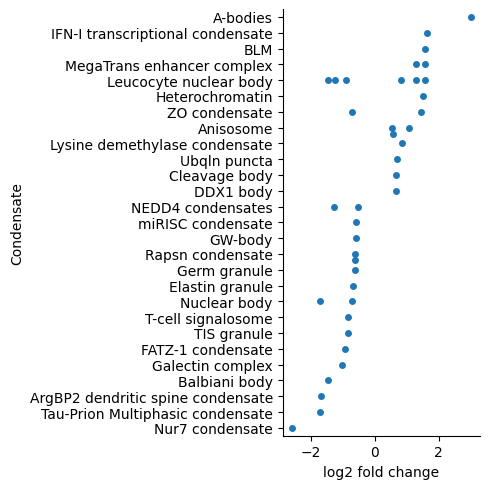

In [257]:
PCCE['log2 fold change'] = PCCE['log2 fold change'].astype(float)

filtered_data = PCCE[(PCCE['log2 fold change'] > 0.5) | (PCCE['log2 fold change'] < -0.5)] 

sorted_data = filtered_data.sort_values('log2 fold change', ascending=False)
sorted_data = sorted_data[sorted_data['Condensate'].str.contains('Synthetic')==False]

sns.catplot(y='Condensate', x='log2 fold change', kind="swarm", data=sorted_data)

### Significant Condensates Descriptions

In [267]:
condensate_parents = pd.read_json('/work/Condensate_Data/condensate_parents.json',  lines=True)

In [268]:
list(sorted_data["Condensate"])

['A-bodies',
 'IFN-I transcriptional condensate',
 'BLM',
 'MegaTrans enhancer complex',
 'Leucocyte nuclear body',
 'Heterochromatin',
 'ZO condensate',
 'Leucocyte nuclear body',
 'MegaTrans enhancer complex',
 'Anisosome',
 'Lysine demethylase condensate',
 'Leucocyte nuclear body',
 'Ubqln puncta',
 'Cleavage body',
 'DDX1 body',
 'Anisosome',
 'Anisosome',
 'NEDD4 condensates',
 'miRISC condensate',
 'GW-body',
 'Rapsn condensate',
 'Rapsn condensate',
 'Germ granule',
 'Elastin granule',
 'ZO condensate',
 'Nuclear body',
 'T-cell signalosome',
 'TIS granule',
 'Leucocyte nuclear body',
 'FATZ-1 condensate',
 'Galectin complex',
 'Leucocyte nuclear body',
 'NEDD4 condensates',
 'Leucocyte nuclear body',
 'Balbiani body',
 'ArgBP2 dendritic spine condensate',
 'Nuclear body',
 'Tau-Prion Multiphasic condensate',
 'Nur7 condensate']

In [269]:
filtered_condensate_parents = condensate_parents[condensate_parents["name"].isin(sorted_data["Condensate"])]
filtered_condensate_parents[['name','description']]

,name,description
11,Heterochromatin,Chromatin is a complex of DNA and histone prot...
12,Galectin complex,The N-terminal domain of Galectin-3 contains a...
13,TIS granule,The TIS granule is a filamentous condensate th...
14,Heterochromatin,Chromatin is a complex of DNA and histone prot...
26,miRISC condensate,miRISC is a multi-protein assembly that identi...
27,Nuclear body,"Nuclear bodies are membraneless, RNA-rich orga..."
28,GW-body,The mammalian analog of P-bodies is known as G...
29,Nuclear body,"Nuclear bodies are membraneless, RNA-rich orga..."
30,T-cell signalosome,T-cell signalling is a dynamic process involvi...
38,Elastin granule,Monomers in elastin can phase separate and sel...


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5fb5b939-efbd-40d4-acad-3cc4c31f5f0c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>